## 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

%matplotlib inline 
pd.set_option('display.max_columns',500) #allows for up to 500 columns to be displayed when viewing a dataframe
plt.style.use('seaborn')

## 2. Import Data

In [11]:
df_station = pd.read_csv('data/station.csv', index_col = 0, header=0)
df_weather = pd.read_csv('data/weather.csv', index_col = None, header=0)


In [3]:
df_status = pd.read_csv('data/status.csv', index_col = None, header=0)
df_trip = pd.read_csv('data/trip.csv', index_col = 0, header=0)

In [12]:
#only include relevant columns for the weather dataframe
df_weather = df_weather[['date','zip_code','max_temperature_f','mean_temperature_f','min_temperature_f','mean_dew_point_f','mean_humidity','max_wind_Speed_mph','mean_wind_speed_mph','max_gust_speed_mph','precipitation_inches','cloud_cover','events','wind_dir_degrees']]

In [13]:
#make sure it worked
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  3665 non-null   object 
 1   zip_code              3665 non-null   int64  
 2   max_temperature_f     3661 non-null   float64
 3   mean_temperature_f    3661 non-null   float64
 4   min_temperature_f     3661 non-null   float64
 5   mean_dew_point_f      3611 non-null   float64
 6   mean_humidity         3611 non-null   float64
 7   max_wind_Speed_mph    3664 non-null   float64
 8   mean_wind_speed_mph   3664 non-null   float64
 9   max_gust_speed_mph    2766 non-null   float64
 10  precipitation_inches  3664 non-null   object 
 11  cloud_cover           3664 non-null   float64
 12  events                522 non-null    object 
 13  wind_dir_degrees      3664 non-null   float64
dtypes: float64(10), int64(1), object(3)
memory usage: 401.0+ KB


In [14]:
#only include relevant columns for the station dataframe
df_station = df_station[['zip_code','name','city','dock_count']]

In [15]:
#make sure it worked
df_station.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70 entries, 2 to 84
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   zip_code    70 non-null     int64 
 1   name        70 non-null     object
 2   city        70 non-null     object
 3   dock_count  70 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 2.7+ KB


In [25]:
df_status.head()

,Unnamed: 0,station_id,bikes_available,time
0,0,2,2,2013/08/29 12:06:01
1,1,2,2,2013/08/29 12:07:01
2,2,2,2,2013/08/29 12:08:01
3,3,2,2,2013/08/29 12:09:01
4,4,2,2,2013/08/29 12:10:01


## 3. Change Objects to Dates

This section changes the appropriate columns from an object to a date.

In [26]:
#change to datetime objects
df_weather.date = pd.to_datetime(df_weather.date)
df_trip.start_date = pd.to_datetime(df_trip.start_date)
df_trip.end_date = pd.to_datetime(df_trip.end_date)
df_status.time = pd.to_datetime(df_status.time)

In [27]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  3665 non-null   datetime64[ns]
 1   zip_code              3665 non-null   int64         
 2   max_temperature_f     3661 non-null   float64       
 3   mean_temperature_f    3661 non-null   float64       
 4   min_temperature_f     3661 non-null   float64       
 5   mean_dew_point_f      3611 non-null   float64       
 6   mean_humidity         3611 non-null   float64       
 7   max_wind_Speed_mph    3664 non-null   float64       
 8   mean_wind_speed_mph   3664 non-null   float64       
 9   max_gust_speed_mph    2766 non-null   float64       
 10  precipitation_inches  3664 non-null   object        
 11  cloud_cover           3664 non-null   float64       
 12  events                522 non-null    object        
 13  wind_dir_degrees  

In [28]:
df_trip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 669959 entries, 4576 to 432947
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   start_date         669959 non-null  datetime64[ns]
 1   start_station_id   669959 non-null  int64         
 2   end_date           669959 non-null  datetime64[ns]
 3   end_station_id     669959 non-null  int64         
 4   bike_id            669959 non-null  int64         
 5   subscription_type  669959 non-null  object        
dtypes: datetime64[ns](2), int64(3), object(1)
memory usage: 35.8+ MB


In [29]:
df_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71984434 entries, 0 to 71984433
Data columns (total 4 columns):
 #   Column           Dtype         
---  ------           -----         
 0   Unnamed: 0       int64         
 1   station_id       int64         
 2   bikes_available  int64         
 3   time             datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 2.1 GB


Summary: The datetime features were imported as objects. Therefore, I converted them to be dates. This will help to create other features and do calculations with these features.

## 4. Create additional date features

- For df_weather
    - i. Create a [‘day’] feature with number for dayofweek
    - ii.Create a [‘month’] feature with number for month
    - iii.Create a [‘year’] feature with number for year
- For df_trip
    - i.Create a [‘date’] feature with number for date
    - ii.Create a [‘day’] feature with number for dayofweek
    - iii.Create a [‘month’] feature with number for month
    - iv.Create a [‘year’] feature with number for year
    - v.Create a [‘day_of_week’] feature with number for day_name( )
    - vi.Create a [‘trip_time’] feature by finding the difference between [‘start_date’] and [‘end_date’]
    - vii.Create a [‘trip_time_m’] features by converting [‘trip_time’] to minutes
- For df_status
    - i.Create a [‘date’] feature based on [‘time’]

In [31]:
#create new df_weather features
df_weather['day'] = df_weather.date.dt.dayofweek
df_weather['month'] = df_weather.date.dt.month
df_weather['year'] = df_weather.date.dt.year

In [32]:
#make sure it worked
df_weather.head()

,date,zip_code,max_temperature_f,mean_temperature_f,min_temperature_f,mean_dew_point_f,mean_humidity,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,day,month,year
0,2013-08-29,94107,74.0,68.0,61.0,58.0,75.0,23.0,11.0,28.0,0,4.0,NaN,286.0,3,8,2013
1,2013-08-30,94107,78.0,69.0,60.0,58.0,70.0,29.0,13.0,35.0,0,2.0,NaN,291.0,4,8,2013
2,2013-08-31,94107,71.0,64.0,57.0,56.0,75.0,26.0,15.0,31.0,0,4.0,NaN,284.0,5,8,2013
3,2013-09-01,94107,74.0,66.0,58.0,56.0,68.0,25.0,13.0,29.0,0,4.0,NaN,284.0,6,9,2013
4,2013-09-02,94107,75.0,69.0,62.0,60.0,77.0,23.0,12.0,30.0,0,6.0,NaN,277.0,0,9,2013


In [43]:
#create new df_trip features
df_trip['date'] = df_trip.start_date.dt.date
df_trip['day'] = df_trip.start_date.dt.dayofweek
df_trip['month'] = df_trip.start_date.dt.month
df_trip['year'] = df_trip.start_date.dt.year
df_trip['day_of_week'] = df_trip.start_date.dt.day_name()
df_trip['trip_time'] = df_trip.end_date - df_trip.start_date
df_trip['trip_time_m'] = pd.to_timedelta(df_trip['trip_time']).astype('timedelta64[m]').astype(int)

In [77]:
df_trip.sample(7)

,start_date,start_station_id,end_date,end_station_id,bike_id,subscription_type,date,day,month,year,day_of_week,trip_time,trip_time_m
id,,,,,,,,,,,,,
505827,2014-10-20 07:10:00,55,2014-10-20 07:16:00,61,418,Subscriber,2014-10-20,0,10,2014,Monday,00:06:00,6
310666,2014-06-04 14:58:00,64,2014-06-04 15:05:00,57,511,Subscriber,2014-06-04,2,6,2014,Wednesday,00:07:00,7
339911,2014-06-26 07:23:00,69,2014-06-26 07:37:00,66,405,Subscriber,2014-06-26,3,6,2014,Thursday,00:14:00,14
372930,2014-07-21 17:09:00,77,2014-07-21 17:19:00,69,406,Subscriber,2014-07-21,0,7,2014,Monday,00:10:00,10
666896,2015-03-04 08:18:00,66,2015-03-04 08:32:00,75,222,Subscriber,2015-03-04,2,3,2015,Wednesday,00:14:00,14
81070,2013-11-02 12:42:00,68,2013-11-02 12:57:00,74,327,Customer,2013-11-02,5,11,2013,Saturday,00:15:00,15
272207,2014-05-05 14:02:00,68,2014-05-05 17:54:00,68,519,Customer,2014-05-05,0,5,2014,Monday,03:52:00,232


In [47]:
#create new df_status feature
df_status['date'] = df_status.time.dt.date

In [48]:
df_status.head()

,Unnamed: 0,station_id,bikes_available,time,date
0,0,2,2,2013-08-29 12:06:01,2013-08-29
1,1,2,2,2013-08-29 12:07:01,2013-08-29
2,2,2,2,2013-08-29 12:08:01,2013-08-29
3,3,2,2,2013-08-29 12:09:01,2013-08-29
4,4,2,2,2013-08-29 12:10:01,2013-08-29


Summary: We created additional date features to be able to explore and visualize our data on a more granular level and potentially create features that could produce a more effective model.

## 5. Explore and visualize weather

- Show the mean for all features based on [‘month’]
- Show the mean for [‘mean_temperature_f’] based on [‘year’] and [‘month’]
- Show a barplot for [‘mean_temperature_f’] for each [‘month’]

In [58]:
# Show the mean for all features based on [‘month’]
mean_by_month = df_weather.groupby(by = 'month',as_index = False).mean()

In [59]:
#check out the new dataframe
mean_by_month

,month,zip_code,max_temperature_f,mean_temperature_f,min_temperature_f,mean_dew_point_f,mean_humidity,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,cloud_cover,wind_dir_degrees,day,year
0,1,94325.0,63.174194,52.809677,42.538710,41.090323,68.200000,11.312903,2.858065,16.133641,2.187097,256.261290,3.048387,2014.500000
1,2,94325.0,64.482143,56.135714,47.635714,46.575000,72.835714,16.410714,5.503571,24.372727,3.660714,248.942857,3.000000,2014.500000
2,3,94325.0,69.541935,59.719355,49.577419,46.783172,65.614887,15.987097,5.883871,22.197044,2.903226,253.587097,3.000000,2014.500000
3,4,94325.0,69.570000,59.913333,49.976667,45.663333,63.050000,18.506667,7.276667,23.924779,2.730000,283.053333,2.933333,2014.500000
4,5,94325.0,70.550489,62.244300,53.628664,47.859935,63.589577,19.506452,8.148387,24.641434,3.516129,278.883871,3.145161,2014.500000
5,6,94325.0,75.806667,66.346667,56.633333,53.227425,66.384615,18.163333,7.600000,23.283105,2.340000,282.770000,2.916667,2014.500000
6,7,94325.0,77.651613,69.238710,60.500000,56.861290,68.809677,18.758065,7.883871,23.354167,2.977419,277.309677,2.951613,2014.500000
7,8,94325.0,77.969136,69.561728,60.873457,57.024845,68.552795,17.941358,7.314815,22.979839,3.040123,277.061728,3.169231,2014.430769
8,9,94325.0,77.006667,67.730000,58.330000,55.216216,68.253378,17.863333,6.383333,23.542510,2.486667,300.456667,2.916667,2013.500000
9,10,94325.0,74.193548,63.229032,52.203226,48.181818,63.366883,15.106452,4.635484,22.589520,1.961290,284.596774,2.951613,2013.500000


In [56]:
# Show the mean for [‘mean_temperature_f’] based on [‘year’] and [‘month’]
mean_temp_by_year_and_month = df_weather.groupby(by = ['year','month'],as_index = False).mean()[['year','month','mean_temperature_f']]

In [57]:
#check out the new dataframe
mean_temp_by_year_and_month

,year,month,mean_temperature_f
0,2013,8,70.466667
1,2013,9,67.253333
2,2013,10,60.774194
3,2013,11,56.093333
4,2013,12,48.019355
5,2014,1,53.529032
6,2014,2,54.628571
7,2014,3,59.393548
8,2014,4,60.506667
9,2014,5,64.812903


Text(0.5, 1.0, 'Mean Temperature by Month')

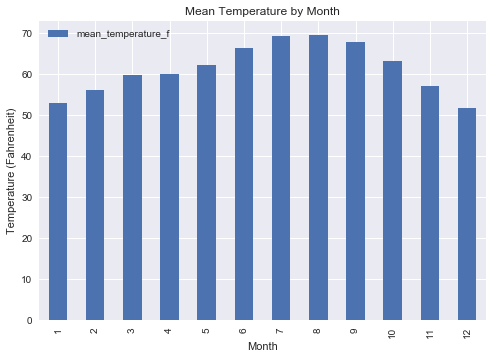

In [64]:
# Show a barplot for [‘mean_temperature_f’] for each [‘month’]
mean_by_month.plot.bar(x='month',y='mean_temperature_f')
plt.xlabel("Month")
plt.ylabel("Temperature (Fahrenheit)")
plt.title("Mean Temperature by Month")

Summary: We explored the weather dataframe to find possible trends or anomalies in the data to better understand the data and find out what could be valuable for a predictive model.

## 6. Explore and visualize trips

- Create a new dataframe named df_trip_day which groups trips based on [‘date’]
- Create a visualization that shows two boxplots –one for trip_count and one for trip_time_m for each day of the week.

In [106]:
#create a count of the bike ids by date
df_trip_day = df_trip.groupby(by = ['date'],as_index = False).count()[['date','bike_id']]
df_trip_day = df_trip_day.rename(columns={"bike_id": "trip_count"})


In [107]:
df_trip_day.head()

,date,trip_count
0,2013-08-29,748
1,2013-08-30,714
2,2013-08-31,640
3,2013-09-01,706
4,2013-09-02,661


In [108]:
# create a temp dataframe that will be merged into the other dataframe
df_trip_m = pd.DataFrame(df_trip.groupby(['date'])['trip_time_m'].sum())
df_trip_m = df_trip_m.reset_index()

In [109]:
df_trip_m.head()

,date,trip_time_m
0,2013-08-29,19488
1,2013-08-30,32190
2,2013-08-31,39009
3,2013-09-01,40070
4,2013-09-02,25724


In [110]:
# merge the two datasets on date
df_trip_day = pd.merge(df_trip_day,df_trip_m,how='left',on='date')

In [111]:
df_trip_day.head()

,date,trip_count,trip_time_m
0,2013-08-29,748,19488
1,2013-08-30,714,32190
2,2013-08-31,640,39009
3,2013-09-01,706,40070
4,2013-09-02,661,25724


In [124]:
#create a datetime format column to extract dt attributes as features below
df_trip_day['datetime'] = pd.to_datetime(df_trip_day.date)

In [125]:
# add in other date features
df_trip_day['day_name'] = df_trip_day.datetime.dt.day_name()
df_trip_day['month'] = df_trip_day.datetime.dt.month
df_trip_day['year'] = df_trip_day.datetime.dt.year

In [126]:
df_trip_day.head()

,date,trip_count,trip_time_m,day_name,month,year,datetime
0,2013-08-29,748,19488,Thursday,8,2013,2013-08-29
1,2013-08-30,714,32190,Friday,8,2013,2013-08-30
2,2013-08-31,640,39009,Saturday,8,2013,2013-08-31
3,2013-09-01,706,40070,Sunday,9,2013,2013-09-01
4,2013-09-02,661,25724,Monday,9,2013,2013-09-02


In [127]:
#drop unnecessary column
df_trip_day = df_trip_day.drop(columns='datetime')

In [128]:
df_trip_day.head()

,date,trip_count,trip_time_m,day_name,month,year
0,2013-08-29,748,19488,Thursday,8,2013
1,2013-08-30,714,32190,Friday,8,2013
2,2013-08-31,640,39009,Saturday,8,2013
3,2013-09-01,706,40070,Sunday,9,2013
4,2013-09-02,661,25724,Monday,9,2013


In [138]:
trip_time_by_weekday = df_trip_day[['day_name','trip_time_m']].groupby(by = 'day_name',as_index = False)

In [140]:
trip_time_by_weekday.head()

,day_name,trip_time_m
0,Thursday,19488
1,Friday,32190
2,Saturday,39009
3,Sunday,40070
4,Monday,25724
5,Tuesday,17342
6,Wednesday,17889
7,Thursday,16051
8,Friday,22263
9,Saturday,32387


Text(0.5, 1.0, 'Trip Volume by Weekday')

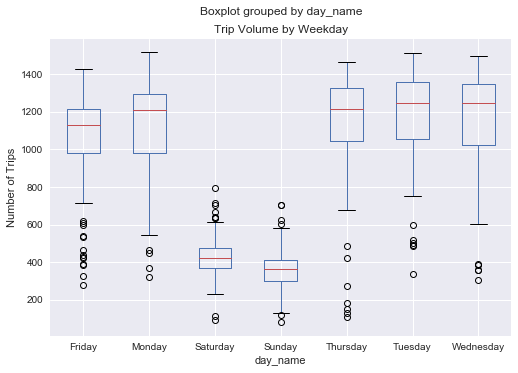

In [169]:
df_trip_day.boxplot(by = 'day_name',column='trip_count')

plt.ylabel("Number of Trips")
plt.title("Trip Volume by Weekday")


Text(0.5, 1.0, 'Trip Time by Weekday')

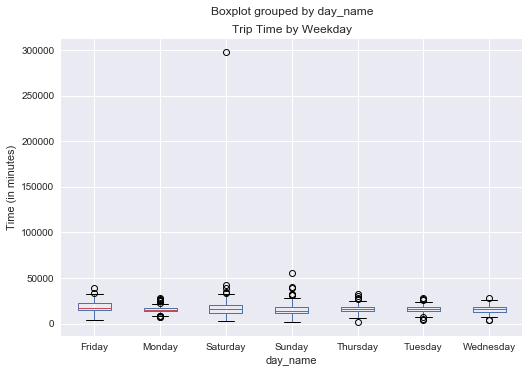

In [170]:
df_trip_day.boxplot(by = 'day_name',column='trip_time_m')
plt.ylabel("Time (in minutes)")
plt.title("Trip Time by Weekday")

Summary: We took a look at the trips dataset and decided to explore the data by weekday. Through this, we were able to find an outlier in the data and can clearly see that the trip volume is significantly less (more than 50% less on average) on the weekend days as compared to the weekdays.

## 7. Find the outlier and recreate visualization

- What happened in the trip_time_m on Saturday?  

In [178]:
# find possible outliers for trip_time_m feature
df_trip_day.nlargest(10, ['trip_time_m']) 

,date,trip_count,trip_time_m,day_name,month,year
464,2014-12-06,419,297575,Saturday,12,2014
668,2015-06-28,407,55256,Sunday,6,2015
611,2015-05-02,351,42249,Saturday,5,2015
3,2013-09-01,706,40070,Sunday,9,2013
220,2014-04-06,378,39307,Sunday,4,2014
680,2015-07-10,1244,39125,Friday,7,2015
2,2013-08-31,640,39009,Saturday,8,2013
16,2013-09-14,702,34685,Saturday,9,2013
660,2015-06-20,411,34197,Saturday,6,2015
232,2014-04-18,988,33831,Friday,4,2014


In [181]:
df_trip_day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 733 entries, 0 to 732
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         733 non-null    object
 1   trip_count   733 non-null    int64 
 2   trip_time_m  733 non-null    int32 
 3   day_name     733 non-null    object
 4   month        733 non-null    int64 
 5   year         733 non-null    int64 
dtypes: int32(1), int64(3), object(2)
memory usage: 37.2+ KB


In [183]:
#drop the outlier from the dataset
df_trip_day = df_trip_day.drop(464)

In [184]:
df_trip_day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 732 entries, 0 to 732
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         732 non-null    object
 1   trip_count   732 non-null    int64 
 2   trip_time_m  732 non-null    int32 
 3   day_name     732 non-null    object
 4   month        732 non-null    int64 
 5   year         732 non-null    int64 
dtypes: int32(1), int64(3), object(2)
memory usage: 37.2+ KB


Text(0.5, 1.0, 'Trip Time by Weekday')

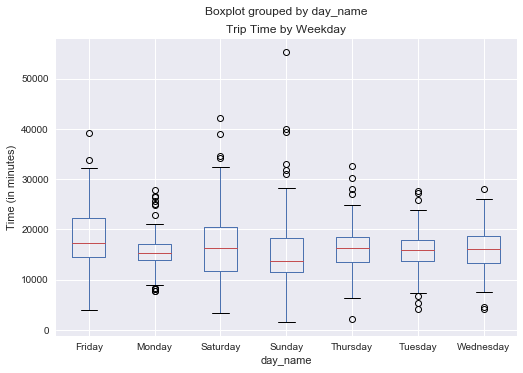

In [186]:
#check out the viz again without the outlier (much better)
df_trip_day.boxplot(by = 'day_name',column='trip_time_m')
plt.ylabel("Time (in minutes)")
plt.title("Trip Time by Weekday")

Summary: We found the anomaly in the dataset and removed it so that our viz looks better and our data isn't skewed. This will help with the predictive modeling piece as well.

## 8. Merge datasets together into one main dataframe

- Create a new Dataframe from df_status named df_status_day
- Create a df_bike Dataframe by merging the four datasets together using:
    - i.df_weather
    - ii.df_trip
    - iii.df_status_day
    - iv.df_station
- In order to merge all 4 DataFrames together, you will need to identify the process and primary and secondary keys.
- Make sure to delete any duplicate columns and rename to their original name.  For example, you will have two month columns, so it adds a x to one column and y to the other, [‘month_x’]and [‘month_y’].  Delete one and change the other back to [‘month’].

In [241]:
#Create a new Dataframe from df_status named df_status_day
df_status_day = df_status.groupby(by = ['date','station_id'],as_index = False).median()

In [242]:
df_status_day = df_status_day.reset_index()

In [243]:
df_status_day = df_status_day[['date','station_id','bikes_available']]

In [244]:
#convert date to be a date instead of an object
df_status_day.date = pd.to_datetime(df_status_day.date)

In [245]:
#check out status day dataframe
df_status_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50388 entries, 0 to 50387
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             50388 non-null  datetime64[ns]
 1   station_id       50388 non-null  int64         
 2   bikes_available  50388 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 1.2 MB


In [262]:
#start by merging trip with station
df_bike = pd.merge(df_trip,df_station, how='inner',left_on='start_station_id', right_on='id')

In [263]:
#make date an actual date instead of object
df_bike.date = pd.to_datetime(df_bike.date)

In [264]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 669959 entries, 0 to 669958
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype          
---  ------             --------------   -----          
 0   start_date         669959 non-null  datetime64[ns] 
 1   start_station_id   669959 non-null  int64          
 2   end_date           669959 non-null  datetime64[ns] 
 3   end_station_id     669959 non-null  int64          
 4   bike_id            669959 non-null  int64          
 5   subscription_type  669959 non-null  object         
 6   date               669959 non-null  datetime64[ns] 
 7   day                669959 non-null  int64          
 8   month              669959 non-null  int64          
 9   year               669959 non-null  int64          
 10  day_of_week        669959 non-null  object         
 11  trip_time          669959 non-null  timedelta64[ns]
 12  trip_time_m        669959 non-null  int32          
 13  zip_code           669959 non

In [265]:
#merge bike with weather
df_bike = pd.merge(df_bike,df_weather,on=['date','zip_code'])

In [266]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 669959 entries, 0 to 669958
Data columns (total 32 columns):
 #   Column                Non-Null Count   Dtype          
---  ------                --------------   -----          
 0   start_date            669959 non-null  datetime64[ns] 
 1   start_station_id      669959 non-null  int64          
 2   end_date              669959 non-null  datetime64[ns] 
 3   end_station_id        669959 non-null  int64          
 4   bike_id               669959 non-null  int64          
 5   subscription_type     669959 non-null  object         
 6   date                  669959 non-null  datetime64[ns] 
 7   day_x                 669959 non-null  int64          
 8   month_x               669959 non-null  int64          
 9   year_x                669959 non-null  int64          
 10  day_of_week           669959 non-null  object         
 11  trip_time             669959 non-null  timedelta64[ns]
 12  trip_time_m           669959 non-null  int32

In [267]:
# merge df_bike and df_status_day
df_bike = pd.merge(df_bike,df_status_day,left_on=['date','start_station_id'],right_on=['date','station_id'])

In [268]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 669958 entries, 0 to 669957
Data columns (total 34 columns):
 #   Column                Non-Null Count   Dtype          
---  ------                --------------   -----          
 0   start_date            669958 non-null  datetime64[ns] 
 1   start_station_id      669958 non-null  int64          
 2   end_date              669958 non-null  datetime64[ns] 
 3   end_station_id        669958 non-null  int64          
 4   bike_id               669958 non-null  int64          
 5   subscription_type     669958 non-null  object         
 6   date                  669958 non-null  datetime64[ns] 
 7   day_x                 669958 non-null  int64          
 8   month_x               669958 non-null  int64          
 9   year_x                669958 non-null  int64          
 10  day_of_week           669958 non-null  object         
 11  trip_time             669958 non-null  timedelta64[ns]
 12  trip_time_m           669958 non-null  int32

In [269]:
#drop duplicate columns and rename
df_bike = df_bike.drop(['month_y','day_y','year_y'], axis = 1)
df_bike = df_bike.rename(columns = {'month_x': 'month', 'day_x': 'day','year_x': 'year'})

In [270]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 669958 entries, 0 to 669957
Data columns (total 31 columns):
 #   Column                Non-Null Count   Dtype          
---  ------                --------------   -----          
 0   start_date            669958 non-null  datetime64[ns] 
 1   start_station_id      669958 non-null  int64          
 2   end_date              669958 non-null  datetime64[ns] 
 3   end_station_id        669958 non-null  int64          
 4   bike_id               669958 non-null  int64          
 5   subscription_type     669958 non-null  object         
 6   date                  669958 non-null  datetime64[ns] 
 7   day                   669958 non-null  int64          
 8   month                 669958 non-null  int64          
 9   year                  669958 non-null  int64          
 10  day_of_week           669958 non-null  object         
 11  trip_time             669958 non-null  timedelta64[ns]
 12  trip_time_m           669958 non-null  int32

Summary: Here we merged all four of the datasets into one dataframe based on primary keys so that we can have all data together to be fed as one matrix into a predictive model.

## 9. Fill in NaN values

- For [‘events’], fill in all of the NaN values with the word ‘None’.
- For [‘precipitation_inches'], replace all ‘T’ values with 0.001.
- For [‘max_temperature_f’], [‘mean_temperature_f‘], and [‘min_temperature_f’], fill in the NaN values with the mean( ).

In [271]:
df_bike.events = df_bike.events.fillna('None')

In [272]:
#check out the changes
df_bike[df_bike.events == 'None'].head()

,start_date,start_station_id,end_date,end_station_id,bike_id,subscription_type,date,day,month,year,day_of_week,trip_time,trip_time_m,zip_code,name,city,dock_count,max_temperature_f,mean_temperature_f,min_temperature_f,mean_dew_point_f,mean_humidity,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,station_id,bikes_available
0,2013-08-29 14:13:00,66,2013-08-29 14:14:00,66,520,Subscriber,2013-08-29,3,8,2013,Thursday,00:01:00,1,94107,South Van Ness at Market,San Francisco,19,74.0,68.0,61.0,58.0,75.0,23.0,11.0,28.0,0,4.0,None,286.0,66,7.0
1,2013-08-29 12:02:00,66,2013-08-29 12:04:00,67,319,Subscriber,2013-08-29,3,8,2013,Thursday,00:02:00,2,94107,South Van Ness at Market,San Francisco,19,74.0,68.0,61.0,58.0,75.0,23.0,11.0,28.0,0,4.0,None,286.0,66,7.0
2,2013-08-29 17:01:00,66,2013-08-29 17:03:00,66,553,Subscriber,2013-08-29,3,8,2013,Thursday,00:02:00,2,94107,South Van Ness at Market,San Francisco,19,74.0,68.0,61.0,58.0,75.0,23.0,11.0,28.0,0,4.0,None,286.0,66,7.0
3,2013-08-29 21:43:00,66,2013-08-29 21:46:00,66,598,Subscriber,2013-08-29,3,8,2013,Thursday,00:03:00,3,94107,South Van Ness at Market,San Francisco,19,74.0,68.0,61.0,58.0,75.0,23.0,11.0,28.0,0,4.0,None,286.0,66,7.0
4,2013-08-29 17:05:00,66,2013-08-29 17:08:00,67,553,Subscriber,2013-08-29,3,8,2013,Thursday,00:03:00,3,94107,South Van Ness at Market,San Francisco,19,74.0,68.0,61.0,58.0,75.0,23.0,11.0,28.0,0,4.0,None,286.0,66,7.0


In [273]:
# ensure no NaN values for events
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 669958 entries, 0 to 669957
Data columns (total 31 columns):
 #   Column                Non-Null Count   Dtype          
---  ------                --------------   -----          
 0   start_date            669958 non-null  datetime64[ns] 
 1   start_station_id      669958 non-null  int64          
 2   end_date              669958 non-null  datetime64[ns] 
 3   end_station_id        669958 non-null  int64          
 4   bike_id               669958 non-null  int64          
 5   subscription_type     669958 non-null  object         
 6   date                  669958 non-null  datetime64[ns] 
 7   day                   669958 non-null  int64          
 8   month                 669958 non-null  int64          
 9   year                  669958 non-null  int64          
 10  day_of_week           669958 non-null  object         
 11  trip_time             669958 non-null  timedelta64[ns]
 12  trip_time_m           669958 non-null  int32

In [274]:
# For [‘precipitation_inches'], replace all ‘T’ values with 0.001
df_bike['precipitation_inches'] = df_bike['precipitation_inches'].replace('T', 0.001)

In [275]:
# make sure it did the replacements as desired
df_bike[df_bike['precipitation_inches'] == .001].head()

,start_date,start_station_id,end_date,end_station_id,bike_id,subscription_type,date,day,month,year,day_of_week,trip_time,trip_time_m,zip_code,name,city,dock_count,max_temperature_f,mean_temperature_f,min_temperature_f,mean_dew_point_f,mean_humidity,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,station_id,bikes_available
23617,2013-09-30 07:46:00,66,2013-09-30 08:02:00,51,551,Subscriber,2013-09-30,0,9,2013,Monday,00:16:00,16,94107,South Van Ness at Market,San Francisco,19,73.0,66.0,59.0,57.0,69.0,22.0,10.0,26.0,0.001,4.0,Fog,264.0,66,10.0
23618,2013-09-30 08:01:00,66,2013-09-30 08:11:00,75,625,Subscriber,2013-09-30,0,9,2013,Monday,00:10:00,10,94107,South Van Ness at Market,San Francisco,19,73.0,66.0,59.0,57.0,69.0,22.0,10.0,26.0,0.001,4.0,Fog,264.0,66,10.0
23619,2013-09-30 08:08:00,66,2013-09-30 08:19:00,77,522,Subscriber,2013-09-30,0,9,2013,Monday,00:11:00,11,94107,South Van Ness at Market,San Francisco,19,73.0,66.0,59.0,57.0,69.0,22.0,10.0,26.0,0.001,4.0,Fog,264.0,66,10.0
23620,2013-09-30 08:13:00,66,2013-09-30 08:20:00,47,564,Subscriber,2013-09-30,0,9,2013,Monday,00:07:00,7,94107,South Van Ness at Market,San Francisco,19,73.0,66.0,59.0,57.0,69.0,22.0,10.0,26.0,0.001,4.0,Fog,264.0,66,10.0
23621,2013-09-30 08:14:00,66,2013-09-30 08:29:00,41,291,Subscriber,2013-09-30,0,9,2013,Monday,00:15:00,15,94107,South Van Ness at Market,San Francisco,19,73.0,66.0,59.0,57.0,69.0,22.0,10.0,26.0,0.001,4.0,Fog,264.0,66,10.0


In [276]:
# For [‘max_temperature_f’], [‘mean_temperature_f‘], and [‘min_temperature_f’], fill in the NaN values with the mean( ).
df_bike.max_temperature_f.fillna(df_bike.max_temperature_f.mean(), inplace=True)
df_bike.mean_temperature_f.fillna(df_bike.mean_temperature_f.mean(), inplace=True)
df_bike.min_temperature_f.fillna(df_bike.min_temperature_f.mean(), inplace=True)

In [278]:
#make sure no NaN values for those 3 columns
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 669958 entries, 0 to 669957
Data columns (total 31 columns):
 #   Column                Non-Null Count   Dtype          
---  ------                --------------   -----          
 0   start_date            669958 non-null  datetime64[ns] 
 1   start_station_id      669958 non-null  int64          
 2   end_date              669958 non-null  datetime64[ns] 
 3   end_station_id        669958 non-null  int64          
 4   bike_id               669958 non-null  int64          
 5   subscription_type     669958 non-null  object         
 6   date                  669958 non-null  datetime64[ns] 
 7   day                   669958 non-null  int64          
 8   month                 669958 non-null  int64          
 9   year                  669958 non-null  int64          
 10  day_of_week           669958 non-null  object         
 11  trip_time             669958 non-null  timedelta64[ns]
 12  trip_time_m           669958 non-null  int32

Summary: Here we dealt with NaN values so that the model will be able to understand the data that is fed to it.

## 10. Create a new column

- Create anew column named [‘docks_avail’].  This column will take the [‘dock_count’] and subtract the [‘bikes_available’] away to indicate the number of docks that remain empty.

In [279]:
df_bike['docks_avail'] = df_bike.dock_count - df_bike.bikes_available

In [284]:
df_bike[['docks_avail']].sample(7)

,docks_avail
298990,13.0
356769,11.0
405528,6.0
36039,12.0
282362,6.0
210909,8.0
631135,9.0


In [285]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 669958 entries, 0 to 669957
Data columns (total 32 columns):
 #   Column                Non-Null Count   Dtype          
---  ------                --------------   -----          
 0   start_date            669958 non-null  datetime64[ns] 
 1   start_station_id      669958 non-null  int64          
 2   end_date              669958 non-null  datetime64[ns] 
 3   end_station_id        669958 non-null  int64          
 4   bike_id               669958 non-null  int64          
 5   subscription_type     669958 non-null  object         
 6   date                  669958 non-null  datetime64[ns] 
 7   day                   669958 non-null  int64          
 8   month                 669958 non-null  int64          
 9   year                  669958 non-null  int64          
 10  day_of_week           669958 non-null  object         
 11  trip_time             669958 non-null  timedelta64[ns]
 12  trip_time_m           669958 non-null  int32

Summary: Created a new feature that could be used to enhance a predictive model.

## 11. Create your own visual

In [301]:
# Do average trip times vary depending on day of the week?
trip_time_by_dow = df_bike.groupby(by = 'day_of_week',as_index = False).mean()[['day_of_week','trip_time_m']]

Text(0.5, 1.0, 'Average Trip Time By Day of Week')

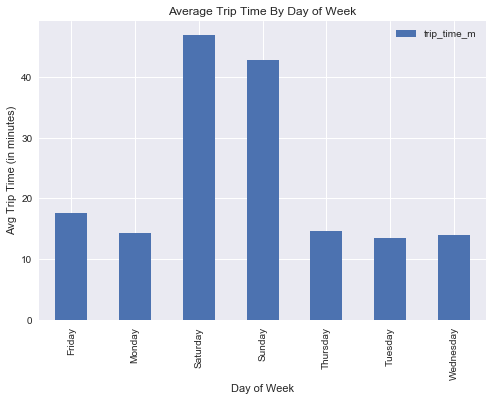

In [303]:
trip_time_by_dow.plot.bar(x='day_of_week',y='trip_time_m')
plt.xlabel("Day of Week")
plt.ylabel("Avg Trip Time (in minutes)")
plt.title("Average Trip Time By Day of Week")

Text(0.5, 1.0, 'Docks Available by Month')

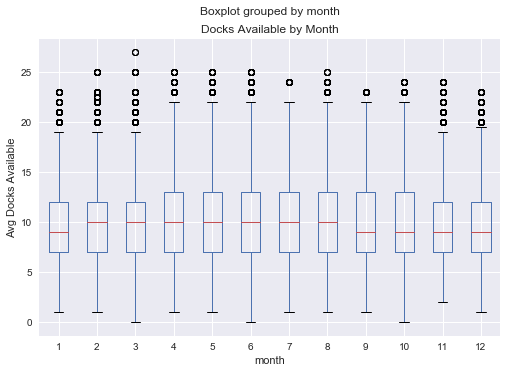

In [317]:
# Are there months where more docks are available?
df_bike.boxplot(by = 'month',column='docks_avail')

plt.ylabel("Avg Docks Available")
plt.title("Docks Available by Month")

Summary: We can clearly see that longer bike rides are taken on the weekends when people presumably have more free time on average. For the second viz, there seems to be a relatively steady demand for these bikes over the entire year since there is no time when there are significantly less docks available for any given month.